# Magnetização X Temp | Calor específico X Temp | Entropia X Temp 

In [12]:
from math import tanh, sinh, log
import matplotlib.pyplot as plt
import numpy as np


kb = 0.086    # em meV/K
mub = 0.05788 # em meV/T
R = 8.316     # Gas constant in J/(mol.K)

Bext = 0.500
n = 1  # Número de íons por célula
gj = 2  # Fator de landé
j = 7 / 2  # Definindo número quântico j.
p = 8  # Número de vizinhos próximos - n sei se ta certo
Tc = 28 # Temperatura crítica
Jo = (3*kb*Tc)/(2*p*((gj-1)**2)*j*(j+1)) # Parâmetro de troca
Ms = n * gj * j * mub # Magnetização de saturação
plambda = (3*kb*Tc)/(n*(mub**2)*((gj)**2)*j*(j+1)) # Intensidade do campo molecular

# gdni4al

Mo = Ms

listaT = []
listaM = []
listaC = [] 
listaS = []

dT=0.01

for T in np.arange(1,50,0.1):
    y = (gj * mub * j * (plambda * Mo+Bext)) / (kb * T)
    M = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                1 / tanh(y / (2 * j))))
    while abs(M - Mo) > 10e-5:
        Mo = M
        y = (gj * mub * j * (plambda * Mo + Bext)) / (kb * T)
        M = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j))))
    S = R*(log(sinh(((2*j+1)/(2 * j)) * y)) - log(sinh(y / (2 * j))) - y * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j)))))
    listaM.append(M/mub)
    listaS.append(S)
    listaT.append(T)

temp = np.array(listaT)
S = np.array(listaS)
C = np.gradient(S,dT)
C = temp*C

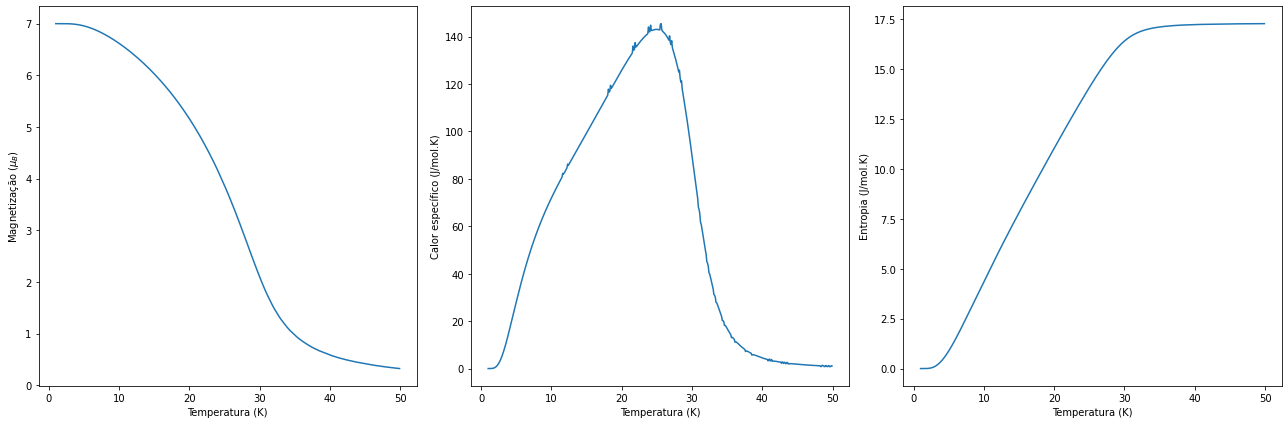

In [13]:
f, axs = plt.subplots(ncols=3,figsize=(18,6))
axs[0].plot(listaT,listaM)
axs[0].set_xlabel("Temperatura (K)")
axs[0].set_ylabel("Magnetização ($\mu_B$)")
axs[1].plot(listaT,C)
axs[1].set_xlabel("Temperatura (K)")
axs[1].set_ylabel("Calor específico (J/mol.K)")
axs[2].plot(temp,S)
axs[2].set_xlabel("Temperatura (K)")
axs[2].set_ylabel("Entropia (J/mol.K)")

f.tight_layout()
plt.show()

# Magnetização X Campo Externo

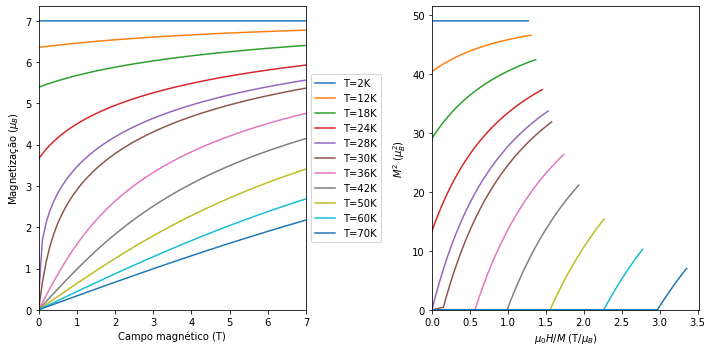

In [11]:
listaBext = []
listaM = []

Mo=Ms

fig, axis = plt.subplots(ncols=2,figsize=(10,5))
for T in 2, 12, 18, 24, 28, 30, 36, 42, 50, 60, 70:
  listaBext = []
  listaM = []
  for Bext in np.arange(0, 9,0.1):
      y = (gj * mub * j * (plambda * Mo+Bext)) / (kb * T)
      M2 = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                1 / tanh(y / (2 * j))))
      while abs(M2 - Mo) > 0.00001:
          Mo = M2
          y = (gj * mub * j * (plambda * Mo + Bext)) / (kb * T)
          M2  = Ms * (((2 * j + 1) / (2 * j)) * (1 / (tanh(((2 * j + 1) / (2 * j)) * y))) - (1 / (2 * j)) * (
                    1 / tanh(y / (2 * j))))
      listaM.append(M2/mub)
      listaBext.append(Bext)
  axis[0].plot(listaBext,listaM,label="T="+str(T)+"K")
  axis[1].plot(np.array(listaBext)/np.array(listaM),np.array(listaM)**2,label="T="+str(T)+"K")

axis[0].set_xlabel("Campo magnético (T)")
axis[0].set_ylabel("Magnetização ($\mu_B$)")
axis[0].set_xlim(0,7)
axis[0].set_ylim(0,)
axis[0].legend(loc='center left', bbox_to_anchor=(1, 0.5))

axis[1].set_xlabel("$\mu_0 H/M$ (T/$\mu_B$)")
axis[1].set_ylabel("$M^2$ ($\mu_B^2$)")
axis[1].set_xlim(0,)
axis[1].set_ylim(0,)

plt.tight_layout()